# Results analysis

The following is the code used to analyze the results from optimization and inference for the TFG **Energy efficiency measurement in optimization and inference of ML models**. We do not perform the analysis in this notebook as it is done directly in the memory of the project. In this notebook we find dataframe transformations and plots used in the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Preliminary analysis

In [2]:
optimization = pd.read_csv('../results/optimization_results.csv')
optimization = optimization[['duration', 'energy_consumed', 'domain', 'model', 'framework', 'strategy']]
optimization['energy_consumed'] = optimization['energy_consumed'] * 1000
optimization

,duration,energy_consumed,domain,model,framework,strategy
0,1.124975,0.018119,NLP,gpt2,torch,pruning
1,0.746583,0.011440,NLP,gpt2,torch,pruning
2,0.874974,0.013732,NLP,gpt2,torch,pruning
3,1.031193,0.016119,NLP,gpt2,torch,pruning
4,0.703145,0.010797,NLP,gpt2,torch,pruning
...,...,...,...,...,...,...
715,93.109754,1.485871,CG,codegpt,tf,quantization
716,92.360154,1.468667,CG,codegpt,tf,quantization
717,95.125613,1.507296,CG,codegpt,tf,quantization
718,96.109462,1.530092,CG,codegpt,tf,quantization


In [3]:
optimization.describe()

,duration,energy_consumed
count,720.000000,720.000000
mean,16.846109,0.267896
std,32.213727,0.512345
min,0.109303,0.001574
25%,0.531257,0.008235
50%,0.984343,0.015450
75%,16.492163,0.262242
max,115.094641,1.824028


In [4]:
optimization.corr()

,duration,energy_consumed
duration,1.000000,0.999956
energy_consumed,0.999956,1.000000


In [5]:
inference = pd.read_csv('../results/inference_results.csv')
inference = inference[['duration', 'energy_consumed', 'domain', 'model', 'framework', 'version', 'correctness']]
inference = inference.replace('quantized.pth', 'quantized')
inference['energy_consumed'] = inference['energy_consumed'] * 1000
inference

,duration,energy_consumed,domain,model,framework,version,correctness
0,59.276125,0.956204,NLP,gpt2,torch,baseline,0.895445
1,59.687963,0.954358,NLP,gpt2,torch,baseline,0.898786
2,60.156222,0.965684,NLP,gpt2,torch,baseline,0.908001
3,61.515913,0.986334,NLP,gpt2,torch,baseline,0.892121
4,59.798992,0.959993,NLP,gpt2,torch,baseline,0.891528
...,...,...,...,...,...,...,...
1075,27.594316,0.441194,Code,codegpt,tf,quantized,0.527349
1076,25.453180,0.405151,Code,codegpt,tf,quantized,0.527349
1077,30.093821,0.479078,Code,codegpt,tf,quantized,0.526099
1078,27.078465,0.430685,Code,codegpt,tf,quantized,0.527349


In [6]:
inference.describe()

,duration,energy_consumed,correctness
count,1080.000000,1080.000000,1080.000000
mean,35.109013,0.563172,0.711619
std,26.135585,0.418429,0.226194
min,1.890588,0.030382,0.000000
25%,8.824165,0.142541,0.559479
50%,34.632315,0.575330,0.764330
75%,56.227463,0.901301,0.887190
max,149.268417,2.388402,0.913981


In [7]:
inference.corr()

,duration,energy_consumed,correctness
duration,1.000000,0.999852,0.016177
energy_consumed,0.999852,1.000000,0.017166
correctness,0.016177,0.017166,1.000000


Looking at the correlation matrices, we find that all the metrics are highly correlated. This is expected, as a more demanding process will take more time to complete, and will consume more energy. There are no missing values and if we use the *describe* function on the datasets with just the important columns we obtain a summary of the numeric columns.

The only remarkable output from these tables is that, for the optimization data, there seems to be some datapoints that are dis-proportionally big. We come to that conclusion given that the mean is more or less in the 75\% and that the maximum is pretty big. With this we conclude that most of the data is concentrated together except a subset of it, which is not behaving like the rest. As we will see in the Results section, this is because of the TensorFlow quantization technique and will be explained then.

Other than that, given that the data collection process is reliable and accurate, that there are no missing values, that the data is consistent and it aligns with the analysis objectives, we find that the data is of good quality and can be used to answer our Research Questions.

## Optimization

We start with the optimization results. We first read the file and select the important columns.

In [8]:
optimization_numeric = optimization[['duration', 'energy_consumed']]
optimization_numeric.mean()

duration           16.846109
energy_consumed     0.267896
dtype: float64

In [9]:
optimization_numeric.sum()

duration           12129.198173
energy_consumed      192.884973
dtype: float64

In [10]:
group_big_opti = optimization.groupby(['framework', 'strategy', 'model']).mean()
group_big_opti

duration  energy_consumed
framework strategy     model                                 
tf        pruning      codegpt      1.330705         0.020893
                       codeparrot   1.076024         0.016917
                       gpt2         1.388012         0.022032
                       opt          1.039053         0.016315
                       regnet       0.413521         0.006352
                       resnet       0.446851         0.006863
          quantization codegpt     97.572360         1.548912
                       codeparrot  87.150836         1.388372
                       gpt2        94.655572         1.505971
                       opt         69.488731         1.104601
                       regnet      17.679698         0.281311
                       resnet      18.745308         0.298450
torch     pruning      codegpt      1.401566         0.025542
                       codeparrot   0.702587         0.010949
                       gpt2         0.812886         0.012698
                       opt          0.818736         0.012761
                       regnet       0.131714         0.001862
                       resnet       0.279122         0.004183
          quantization codegpt      2.298446         0.036255
                       codeparrot   1.341653         0.021157
                       gpt2         2.505200         0.039562
                       opt          2.641139         0.041870
                       regnet       0.156200         0.002263
                       resnet       0.230683         0.003409

This table will be used to build the duration and energy consumption tables in the results section of the memory of the project.

### RQ1.1

In [11]:
group_strat = optimization.groupby(['framework', 'strategy']).mean()
group_strat

duration  energy_consumed
framework strategy                                
tf        pruning        0.949028         0.014895
          quantization  64.215418         1.021269
torch     pruning        0.691102         0.011333
          quantization   1.528887         0.024086

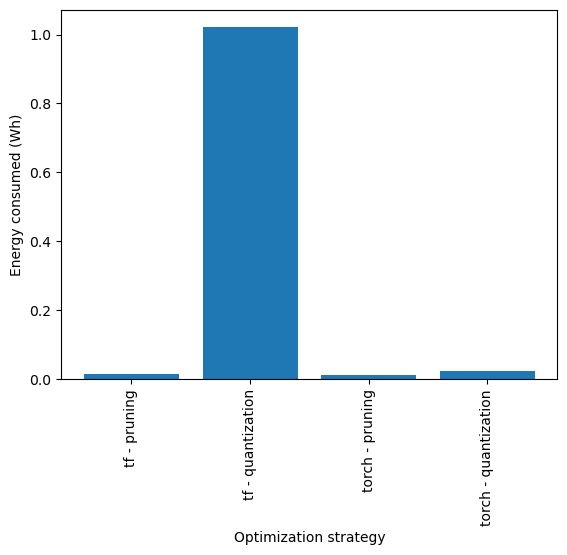

In [12]:
plot_df = group_strat.reset_index()
plt.bar(np.arange(len(plot_df)), plot_df['energy_consumed'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['strategy'], rotation='vertical')

plt.xlabel('Optimization strategy')
plt.ylabel('Energy consumed (Wh)')

plt.show()

### RQ1.2

In [13]:
group_model = optimization.groupby(['domain', 'model']).mean()
group_model

duration  energy_consumed
domain model                                 
CG     codegpt     25.650769         0.407900
       codeparrot  22.567775         0.359349
CV     regnet       4.595283         0.072947
       resnet       4.925491         0.078226
NLP    gpt2        24.840418         0.395066
       opt         18.496915         0.293887

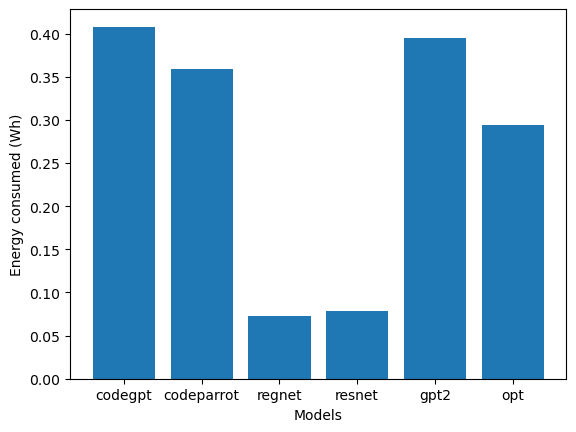

In [14]:
plot_df = group_model.reset_index()
plt.bar(plot_df['model'], plot_df['energy_consumed'])

plt.xlabel('Models')
plt.ylabel('Energy consumed (Wh)')

plt.show()

## Inference

In [15]:
inference_numeric = inference[['duration', 'energy_consumed', 'correctness']]
inference_numeric.mean()

duration           35.109013
energy_consumed     0.563172
correctness         0.711619
dtype: float64

In [16]:
inference_numeric.sum()

duration           37917.733615
energy_consumed      608.225343
correctness          768.548389
dtype: float64

In [17]:
group_big_infer = inference.groupby(['framework', 'version', 'model']).mean()
group_big_infer

duration  energy_consumed  correctness
framework version   model                                              
tf        baseline  codegpt     39.432828         0.631328     0.494224
                    codeparrot  46.448299         0.744113     0.464771
                    gpt2        30.863741         0.498833     0.734385
                    opt         31.415871         0.507181     0.724286
                    regnet       8.744744         0.140803     0.860000
                    resnet       9.913550         0.159748     0.900000
          pruned    codegpt     39.435308         0.629885     0.494547
                    codeparrot  64.089729         1.026151     0.464784
                    gpt2        30.679239         0.499940     0.734821
                    opt         31.424299         0.503286     0.724205
                    regnet       8.962454         0.144133     0.860000
                    resnet       9.849412         0.158973     0.900000
          quantized codegpt     27.972672         0.446836     0.526867
                    codeparrot  72.494331         1.158727     0.701000
                    gpt2        56.884698         0.912619     0.897654
                    opt         21.068433         0.336729     0.826403
                    regnet       1.931486         0.030925     0.860000
                    resnet       2.766083         0.044445     0.900000
torch     baseline  codegpt     57.256663         0.918756     0.552541
                    codeparrot  59.032161         0.945582     0.697520
                    gpt2        59.246016         0.952794     0.896759
                    opt         48.756716         0.782098     0.886735
                    regnet       2.042648         0.033029     0.860000
                    resnet       4.283779         0.069351     0.900000
          pruned    codegpt     57.367741         0.918810     0.552572
                    codeparrot  57.809483         0.924767     0.694588
                    gpt2        60.276941         0.969718     0.898200
                    opt         48.239032         0.773565     0.886977
                    regnet       2.034318         0.032855     0.003333
                    resnet       4.096799         0.066370     0.000000
          quantized codegpt     52.110888         0.834419     0.565526
                    codeparrot  56.742161         0.907453     0.697426
                    gpt2        55.194924         0.887736     0.811521
                    opt         99.185772         1.587283     0.886633
                    regnet       1.950473         0.031507     0.860000
                    resnet       3.920761         0.063432     0.900000

This table will be used to build the duration, energy consumption and correctness tables in the results section of the memory of the project.

### RQ2.1

In [18]:
group_version = inference.groupby(['framework', 'version']).mean()
group_version

duration  energy_consumed  correctness
framework version                                           
tf        baseline   27.803172         0.447001     0.696278
          pruned     30.740074         0.493728     0.696393
          quantized  30.519617         0.488380     0.785321
torch     baseline   38.436331         0.616935     0.798926
          pruned     38.304052         0.614347     0.505945
          quantized  44.850830         0.718638     0.786851

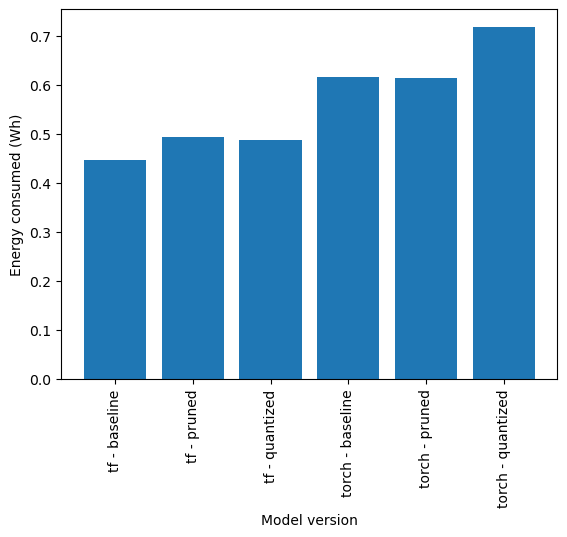

In [19]:
plot_df = group_version.reset_index()
plt.bar(np.arange(len(plot_df)), plot_df['energy_consumed'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('Energy consumed (Wh)')

plt.show()

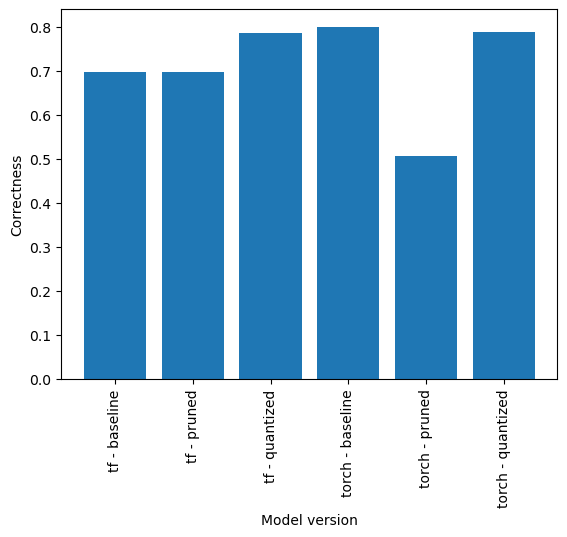

In [20]:
plt.bar(np.arange(len(plot_df)), plot_df['correctness'])

plt.xticks(np.arange(len(plot_df)), plot_df['framework'] + ' - ' + plot_df['version'], rotation='vertical')

plt.xlabel('Model version')
plt.ylabel('Correctness')

plt.show()

### RQ2.2

In [21]:
group_model = inference.groupby(['domain', 'model']).mean()
group_model

duration  energy_consumed  correctness
domain          model                                              
Code            codegpt     45.596017         0.730006     0.531046
                codeparrot  59.436027         0.951132     0.620015
Computer Vision regnet       4.277687         0.068875     0.717222
                resnet       5.805064         0.093720     0.750000
NLP             gpt2        48.857593         0.786940     0.828890
                opt         46.681687         0.748357     0.822540

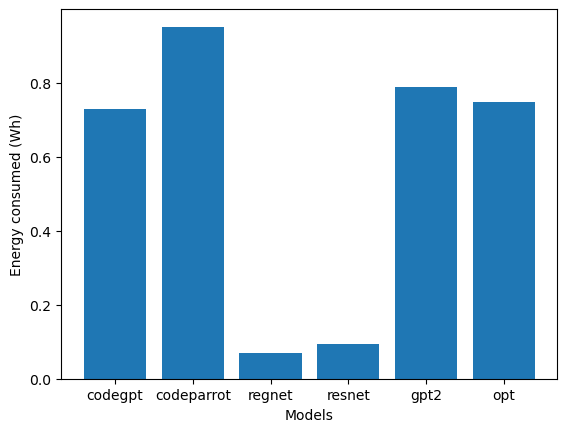

In [22]:
plot_df = group_model.reset_index()
plt.bar(plot_df['model'], plot_df['energy_consumed'])

plt.xlabel('Models')
plt.ylabel('Energy consumed (Wh)')

plt.show()

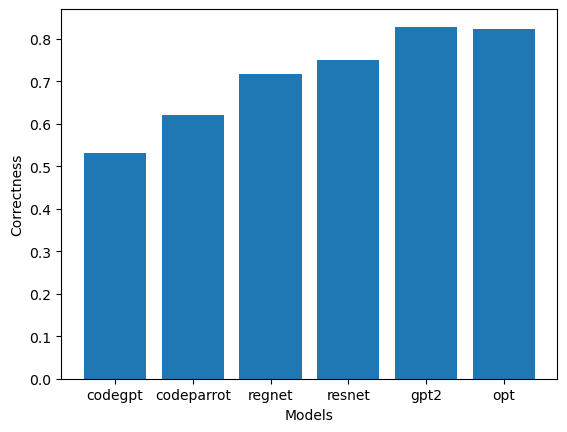

In [23]:
plt.bar(plot_df['model'], plot_df['correctness'])
plt.xlabel('Models')
plt.ylabel('Correctness')
plt.show()

### RQ2.3

In [24]:
def add_energy(row):
    if row['version'] == 'pruned':
        strategy = 'pruning'
    elif row['version'] == 'quantized':
        strategy = 'quantization'
    else:
        strategy = None
    framework = row['framework']
    model = row['model']
    energy = row['energy_consumed']
    df = group_big_opti
    
    matching_row = df.loc[(df['framework'] == framework) & (df['strategy'] == strategy) & (df['model'] == model)]
    
    if not matching_row.empty:
        energy_sum = energy + matching_row['energy_consumed'].values[0]
        return energy_sum
    
    return energy

In [25]:
group_big_opti = group_big_opti.reset_index()
group_big_infer = group_big_infer.reset_index()
group_big_infer['summed_energy'] = group_big_infer.apply(add_energy, axis=1)
group_big_infer = group_big_infer[['framework', 'version', 'model', 'energy_consumed', 'summed_energy', 'correctness']]
group_big_infer

,framework,version,model,energy_consumed,summed_energy,correctness
0,tf,baseline,codegpt,0.631328,0.631328,0.494224
1,tf,baseline,codeparrot,0.744113,0.744113,0.464771
2,tf,baseline,gpt2,0.498833,0.498833,0.734385
3,tf,baseline,opt,0.507181,0.507181,0.724286
4,tf,baseline,regnet,0.140803,0.140803,0.860000
5,tf,baseline,resnet,0.159748,0.159748,0.900000
6,tf,pruned,codegpt,0.629885,0.650778,0.494547
7,tf,pruned,codeparrot,1.026151,1.043068,0.464784
8,tf,pruned,gpt2,0.499940,0.521972,0.734821
9,tf,pruned,opt,0.503286,0.519601,0.724205


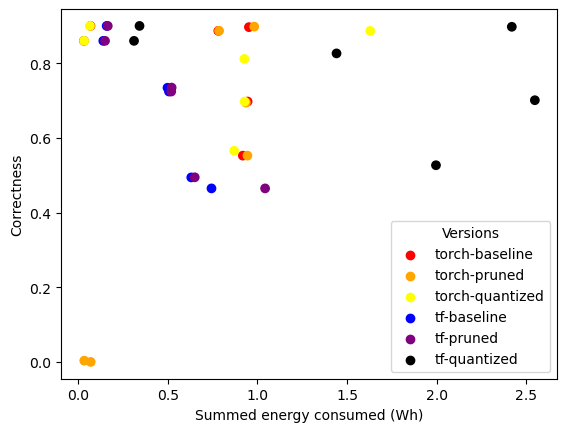

In [26]:
group_big_infer['full_version'] = group_big_infer['framework'] + '-' + group_big_infer['version']

color_dict = {'torch-baseline': 'red', 'torch-pruned': 'orange', 'torch-quantized': 'yellow', 'tf-baseline': 'blue', 'tf-pruned': 'purple', 'tf-quantized': 'black'}
colors = [color_dict.get(category, 'red') for category in group_big_infer['full_version']]

plt.scatter(group_big_infer['summed_energy'], group_big_infer['correctness'], c=colors)
plt.xlabel('Summed energy consumed (Wh)')
plt.ylabel('Correctness')
legend_labels = list(color_dict.keys())
legend_handles = [plt.scatter([], [], color=color_dict[label], label=label) for label in legend_labels]

plt.legend(handles=legend_handles, labels=legend_labels, title='Versions')
plt.show()

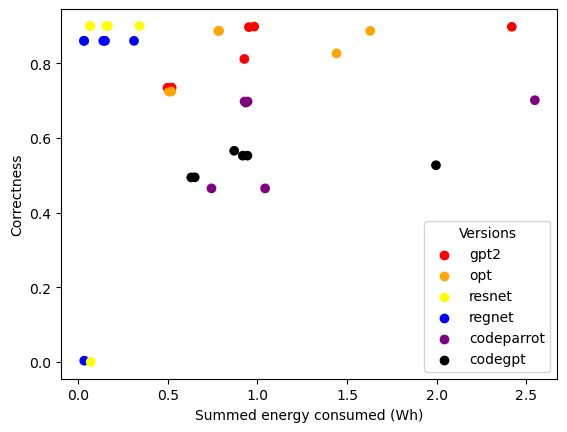

In [27]:
color_dict = {'gpt2': 'red', 'opt': 'orange', 'resnet': 'yellow', 'regnet': 'blue', 'codeparrot': 'purple', 'codegpt': 'black'}
colors = [color_dict.get(category, 'red') for category in group_big_infer['model']]

plt.scatter(group_big_infer['summed_energy'], group_big_infer['correctness'], c=colors)
plt.xlabel('Summed energy consumed (Wh)')
plt.ylabel('Correctness')
legend_labels = list(color_dict.keys())
legend_handles = [plt.scatter([], [], color=color_dict[label], label=label) for label in legend_labels]
plt.legend(handles=legend_handles, labels=legend_labels, title='Versions')
plt.show()